In [97]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
diag_covar = np.load('diag_covar.npz')
full_covar = np.load('full_covar.npz')

In [21]:
diag_covar.files

['n_games',
 'skill_prior_var',
 'approx_covar',
 'lee_sedol_id',
 'n_players',
 'ke_jie_id',
 'approx_mean',
 'alpha_go_id']

In [24]:
full_covar.files

['n_games',
 'skill_prior_var',
 'approx_covar',
 'lee_sedol_id',
 'n_players',
 'ke_jie_id',
 'approx_mean',
 'alpha_go_id']

In [12]:
seed = 1234
prng = np.random.RandomState(seed)
prng?

In [13]:
# Random skill sample from Gaussian posterior approximation.
skill_sample = (approx_mean + prng.normal(size=n_players) * approx_covar**0.5)

In [14]:
#Calculate log probability density at sample point.
log_pdf_sample = stats.multivariate_normal.logpdf(skill_sample,approx_mean,approx_covar)

In [15]:
log_pdf_sample

-258.53856399550409

<h1>4b)</h1>

In [36]:
full_covar['approx_covar'].shape

(1049, 1049)

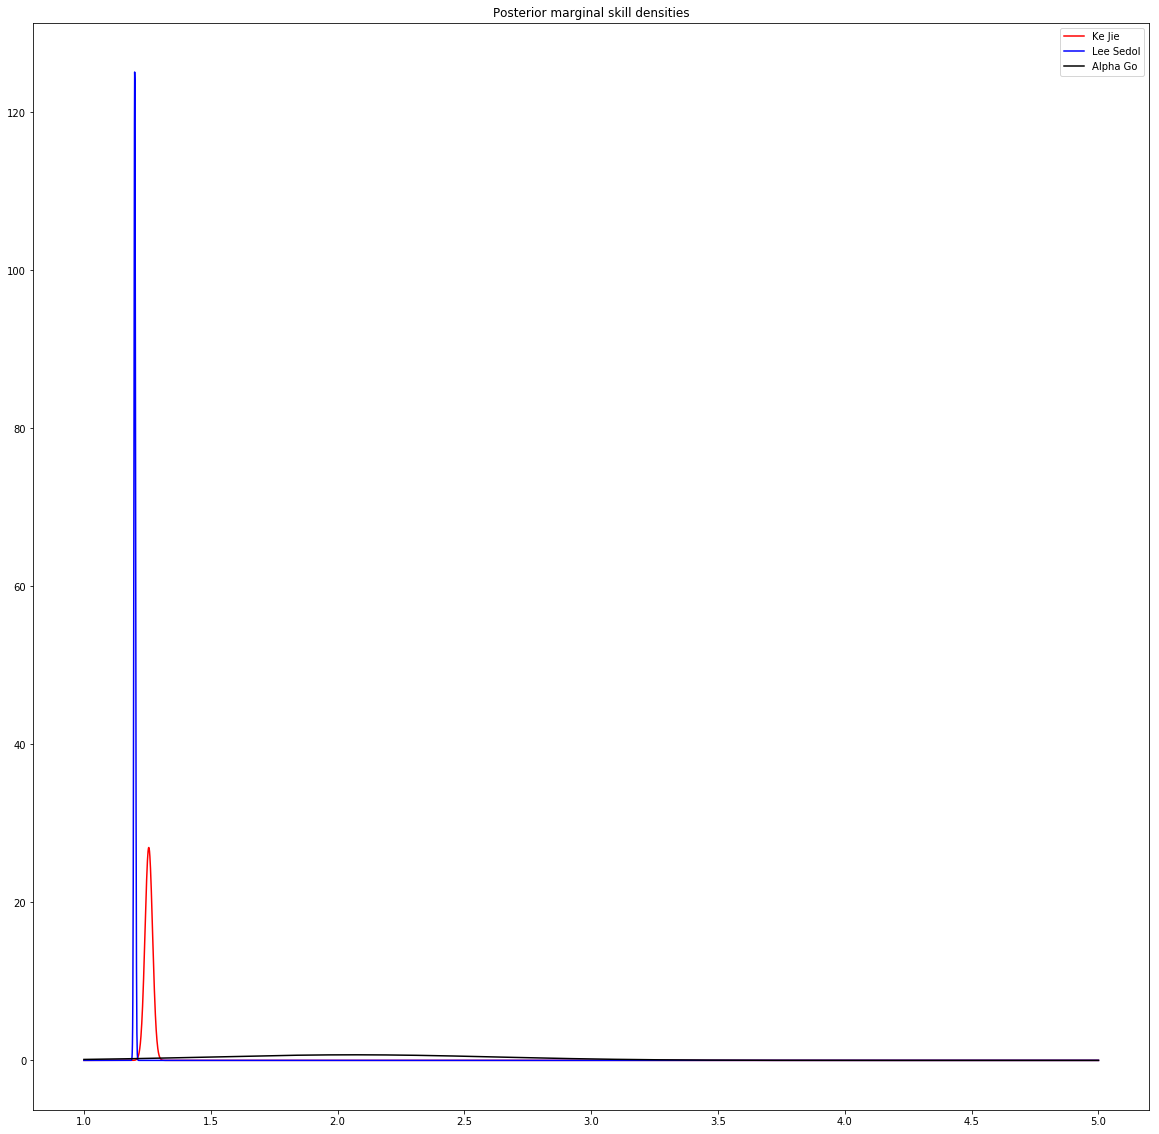

Mean and covariance for lee_sedol: 1.200333 0.003175
Mean and covariance for ke_jie: 1.255716 0.014803
Mean and covariance for alpha_go: 2.063791 0.565306


In [94]:
x = np.linspace(1,5,5000)
means = diag_covar['approx_mean']
covar = diag_covar['approx_covar']
ke_jie_id = diag_covar['ke_jie_id']
alpha_go_id = diag_covar['alpha_go_id']
lee_sedol_id = diag_covar['lee_sedol_id']
y_ke_jie = stats.norm.pdf(x, loc=means[ke_jie_id], scale=covar[ke_jie_id])
y_lee_sedol = stats.norm.pdf(x,loc=means[lee_sedol_id], scale=covar[lee_sedol_id])
y_alpha_go = stats.norm.pdf(x,loc=means[alpha_go_id], scale=covar[alpha_go_id])
plt.figure(figsize=(20,20))
plt.plot(x,y_ke_jie,color='r',label='Ke Jie')
plt.plot(x,y_lee_sedol,color='b',label='Lee Sedol')
plt.plot(x,y_alpha_go,color='k',label='Alpha Go')
plt.title('Posterior marginal skill densities')
plt.legend()
plt.show()

print('Mean and covariance for lee_sedol: {0:.6f} {1:.6f}'.format(means[lee_sedol_id],covar[lee_sedol_id]))
print('Mean and covariance for ke_jie: {0:.6f} {1:.6f}'.format(means[ke_jie_id],covar[ke_jie_id]))
print('Mean and covariance for alpha_go: {0:.6f} {1:.6f}'.format(means[alpha_go_id],covar[alpha_go_id]))


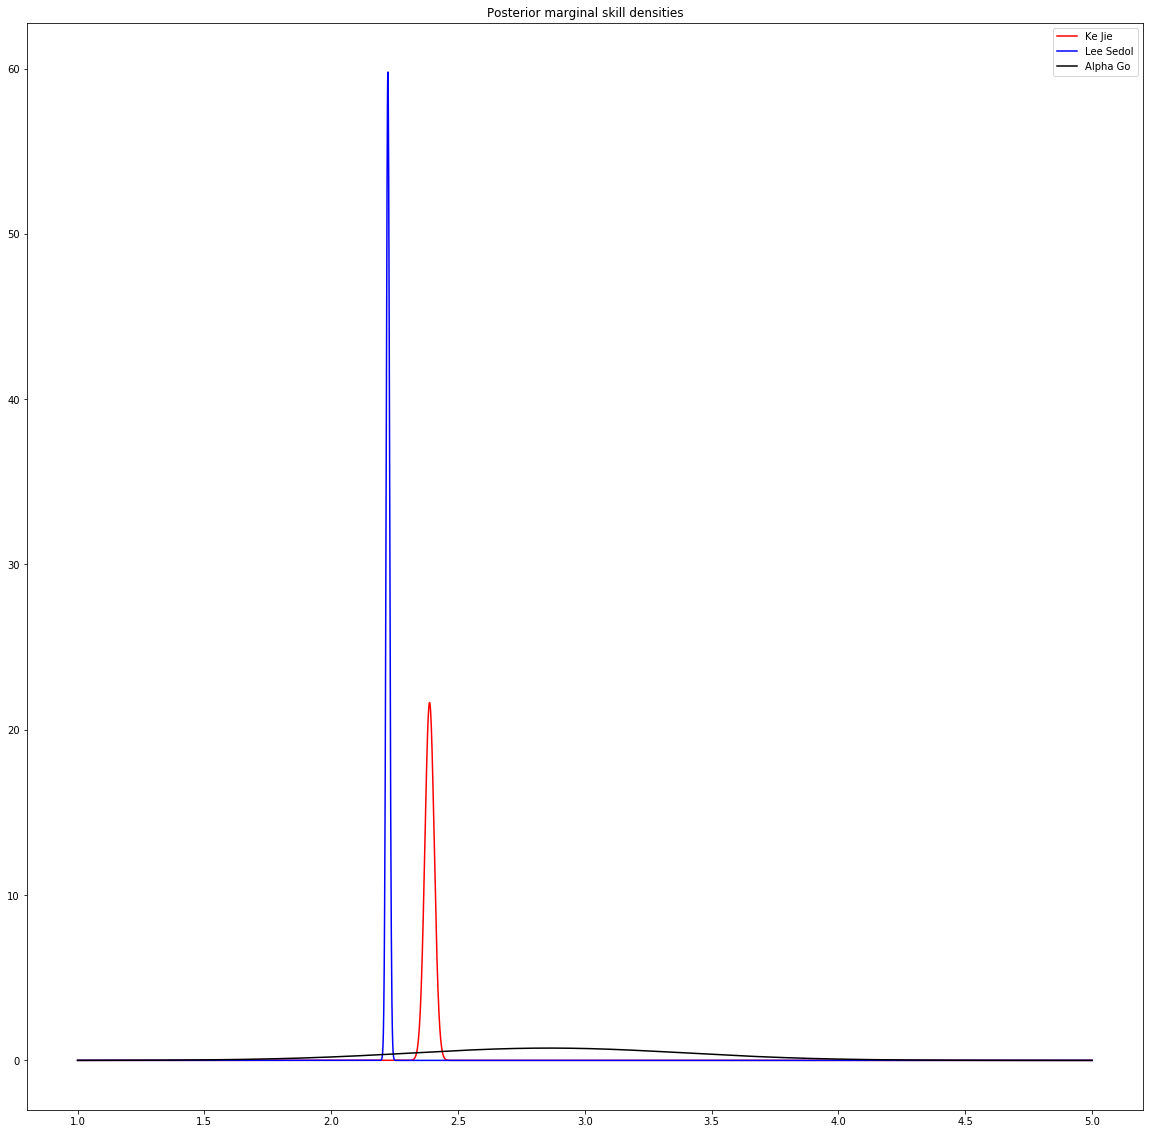

Mean and covariance for lee_sedol: 2.223574 0.006671
Mean and covariance for ke_jie: 2.387858 0.018429
Mean and covariance for alpha_go: 2.859441 0.536453


In [95]:
x = np.linspace(1,5,5000)
means = full_covar['approx_mean']
covar = full_covar['approx_covar']
ke_jie_id = full_covar['ke_jie_id']
alpha_go_id = full_covar['alpha_go_id']
lee_sedol_id = full_covar['lee_sedol_id']
y_ke_jie = stats.norm.pdf(x, loc=means[ke_jie_id], scale=covar[ke_jie_id][ke_jie_id])
y_lee_sedol = stats.norm.pdf(x,loc=means[lee_sedol_id], scale=covar[lee_sedol_id][lee_sedol_id])
y_alpha_go = stats.norm.pdf(x,loc=means[alpha_go_id], scale=covar[alpha_go_id][alpha_go_id])
plt.figure(figsize=(20,20))
plt.plot(x,y_ke_jie,color='r',label='Ke Jie')
plt.plot(x,y_lee_sedol,color='b',label='Lee Sedol')
plt.plot(x,y_alpha_go,color='k',label='Alpha Go')
plt.title('Posterior marginal skill densities')
plt.legend()
plt.show()

print('Mean and covariance for lee_sedol: {0:.6f} {1:.6f}'.format(means[lee_sedol_id],covar[lee_sedol_id][lee_sedol_id]))
print('Mean and covariance for ke_jie: {0:.6f} {1:.6f}'.format(means[ke_jie_id],covar[ke_jie_id][ke_jie_id]))
print('Mean and covariance for alpha_go: {0:.6f} {1:.6f}'.format(means[alpha_go_id],covar[alpha_go_id][alpha_go_id]))


In [100]:
diag_covar.files

['n_games',
 'skill_prior_var',
 'approx_covar',
 'lee_sedol_id',
 'n_players',
 'ke_jie_id',
 'approx_mean',
 'alpha_go_id']

<h1> 4c) </h1>

In [106]:
diag_covar.files

['n_games',
 'skill_prior_var',
 'approx_covar',
 'lee_sedol_id',
 'n_players',
 'ke_jie_id',
 'approx_mean',
 'alpha_go_id']

In [105]:
globals().update(diag_covar)

In [111]:
# Probability that AlphaGo wins against Ke Jie if it's the black player (diag_covar):
x = np.zeros((n_players,))
x[ke_jie_id] = (-1) / math.sqrt(2)
x[alpha_go_id] = 1 / math.sqrt(2)
x = x.reshape(n_players,1)

numerator = np.matmul(approx_mean.reshape((1,n_players)),x)
approx_covar_matrix = np.diag(approx_covar)

denominator = math.sqrt(1 + np.matmul(np.matmul(x.reshape(1,n_players),approx_covar_matrix),x))
probability = stats.norm.cdf(numerator/denominator)
print(probability)

[[ 0.6925442]]


In [112]:
# Full covar:
globals().update(full_covar)

x = np.zeros((n_players,))
x[ke_jie_id] = (-1) / math.sqrt(2)
x[alpha_go_id] = 1 / math.sqrt(2)
x = x.reshape(n_players,1)

numerator = np.matmul(approx_mean.reshape((1,n_players)),x)

denominator = math.sqrt(1 + np.matmul(np.matmul(x.reshape(1,n_players),approx_covar),x))
probability = stats.norm.cdf(numerator/denominator)
print(probability)

[[ 0.61614135]]


In [113]:
np.diag(approx_covar)

array([ 0.00981517,  0.00580127,  0.00982293, ...,  0.7484291 ,
        1.19666772,  0.53645328])

In [114]:
globals().update(diag_covar)
approx_covar

array([ 0.00622467,  0.00215006,  0.00632657, ...,  0.70499435,
        1.12389587,  0.56530606])

In [117]:
full_covar['skill_prior_var']

array(2.9999999999999996)